In [50]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
                          
                            
# Combine the data into a single dataset
complete_df = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
complete_df.head()
#complete_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [51]:
# Obtain the x and y coordinates for each of the three city types

urban_data = complete_df.loc[complete_df["type"] == "Urban"]
suburban_data = complete_df.loc[complete_df["type"] == "Suburban"]
rural_data = complete_df.loc[complete_df["type"] == "Rural"]

urban_grouped = (urban_data.groupby(["city"]).mean())
urban_fare = urban_grouped["fare"]
urban_count = urban_data["city"].value_counts(sort="city")

suburban_grouped = (suburban_data.groupby(["city"]).mean())
suburban_fare = suburban_grouped["fare"]
suburban_count = suburban_data["city"].value_counts(sort="city")

rural_grouped = (rural_data.groupby(["city"]).mean())
rural_fare = rural_grouped["fare"]
rural_count = rural_data["city"].value_counts(sort="city")

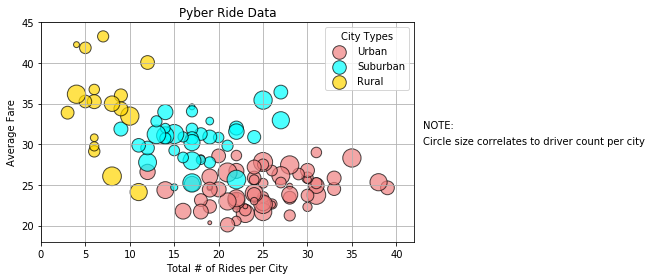

In [60]:
scale= city_data["driver_count"] *5
plt.scatter(urban_count, urban_fare, label="Urban", s=scale, edgecolors= "black", alpha = .7, color= 'lightcoral')
plt.scatter(suburban_count, suburban_fare, label="Suburban", s=scale, edgecolors= "black", alpha = .7, color = 'cyan')
plt.scatter(rural_count, rural_fare, label="Rural", s=scale, edgecolors= "black", alpha = .7, color = 'gold')


plt.ylim(18, 45)
plt.xlim(0, 42)
plt.title("Pyber Ride Data")
plt.xlabel("Total # of Rides per City")
plt.ylabel("Average Fare")
plt.grid(which='major')
plt.legend(title="City Types", numpoints=.1)
plt.text(43, 30, "Circle size correlates to driver count per city")
plt.text(43, 32, "NOTE:")

plt.tight_layout()
plt.savefig("images/Pyber_ScatterPlot.png")
plt.show()

## Total Fares by City Type

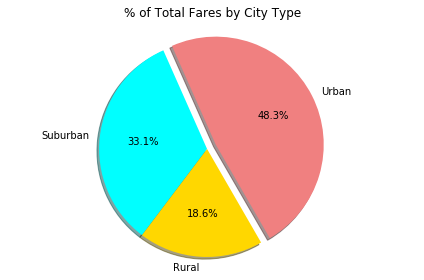

In [58]:
# Calculate Type Percents
#ride_total= urban_fare.sum() + suburban_fare.sum() + rural_fare.sum()

fares = [urban_fare.sum(), suburban_fare.sum(), rural_fare.sum()]
labels= ['Urban', 'Suburban', 'Rural']
colors = ['lightcoral', 'cyan', 'gold']
explode = (.09, 0, 0)

# Build Pie Chart
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)
plt.axis("equal")
plt.title("% of Total Fares by City Type")


# Save Figure

plt.tight_layout()
plt.savefig("images/Total_Fares_PieChart.png")
plt.show()

## Total Rides by City Type

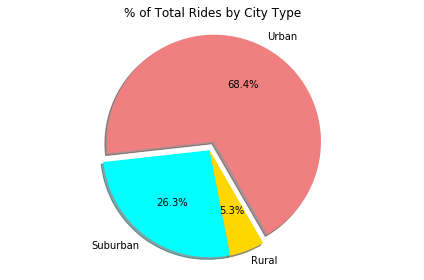

In [59]:
# Calculate Ride Percents

Rides = [urban_count.sum(), suburban_count.sum(), rural_count.sum()]
labels= ['Urban', 'Suburban', 'Rural']
colors = ['lightcoral', 'cyan', 'gold']
explode = (.09, 0, 0)

plt.pie(Rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)
plt.axis("equal")
plt.title("% of Total Rides by City Type")


# Save Figure

plt.tight_layout()
plt.savefig("images/Total_Ride_PieChart.png")
plt.show()


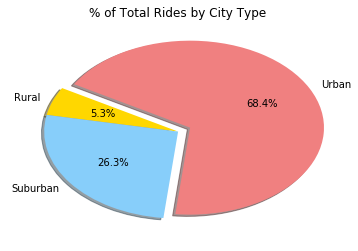

## Total Drivers by City Type

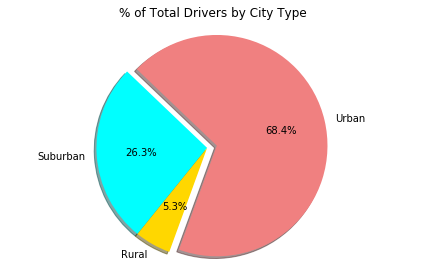

In [57]:
# Calculate Driver Percents

suburban_drivers = suburban_data["driver_count"].value_counts(sort="driver_count").sum()
urban_drivers = urban_data["driver_count"].value_counts(sort="driver_count").sum()
rural_drivers = rural_data["driver_count"].value_counts(sort="driver_count").sum()


# Build Pie Charts

drivers = [urban_drivers, suburban_drivers, rural_drivers]
labels= ['Urban', 'Suburban', 'Rural']
colors = ['lightcoral', 'cyan', 'gold']
explode = (.09, 0, 0)

plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")


# Save Figure

plt.tight_layout()
plt.savefig("images/Total_Drivers_PieChart.png")
plt.show()

# Save Figure


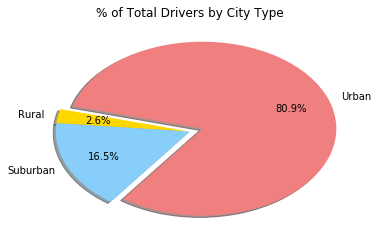